## Linear Regression 

In this notebook, I will be using simple linear regression to predict the housing price using the popular california housing dataset. 

### Importing Libraries and loding data 

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [6]:
data = pd.read_csv("housing.csv")

In [7]:
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


### Some EDA

#### Cheking for missing values 

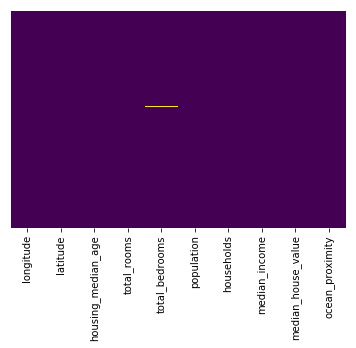

In [8]:
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

We can see that some values in the total_bedroom column are missing 

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [10]:
data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


#### Taking care of missing values 

In [11]:
data.fillna(method='ffill',inplace=True)

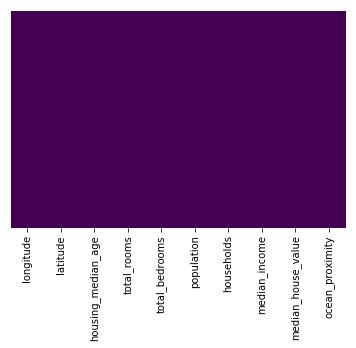

In [12]:
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [13]:
data.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

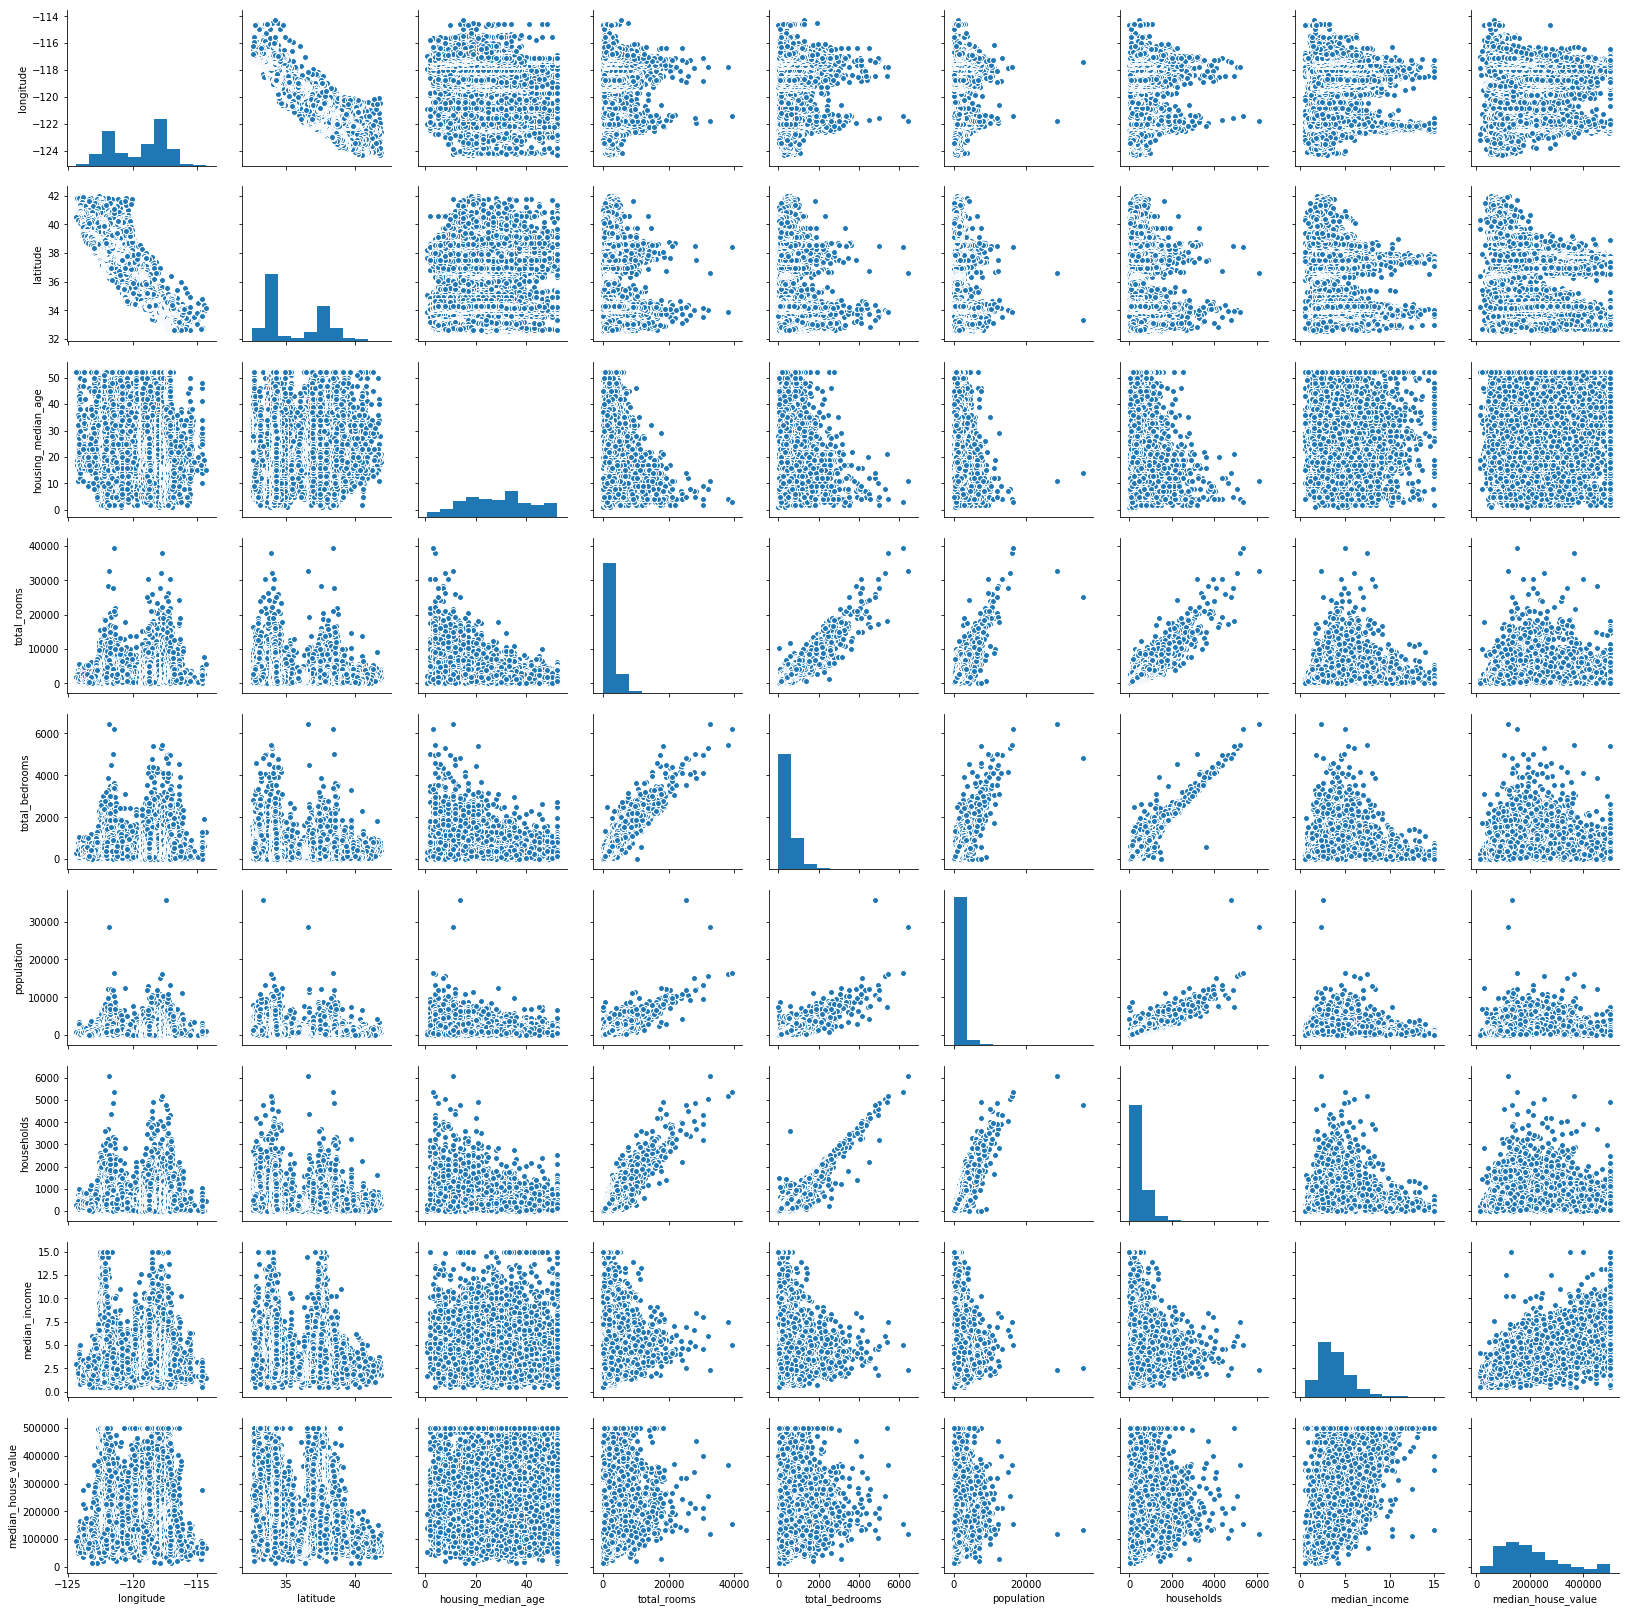

In [11]:
sns.pairplot(data)

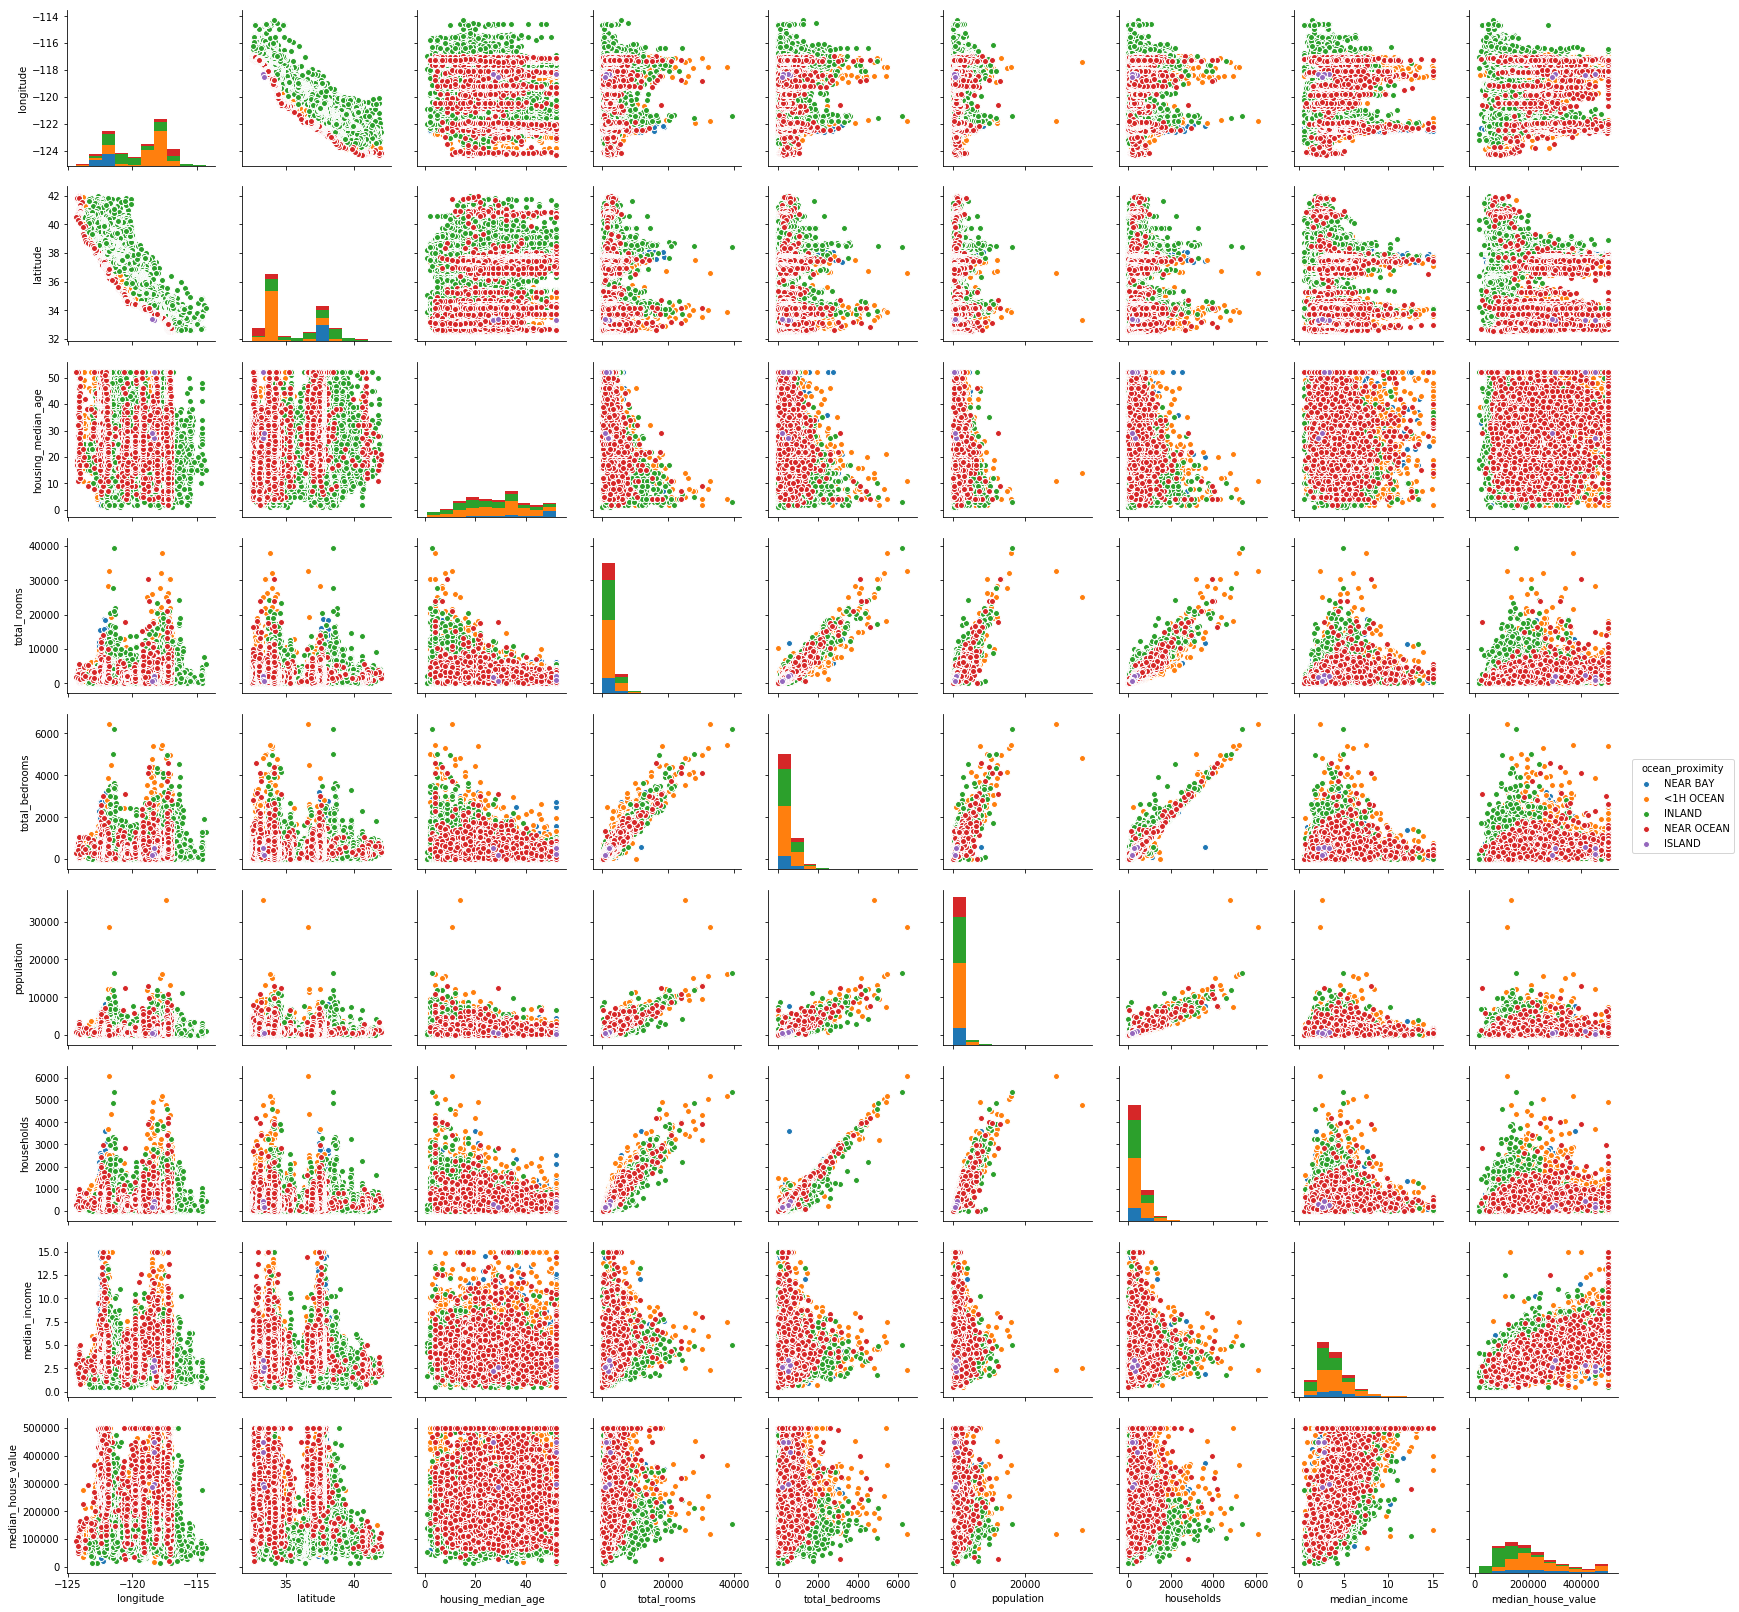

In [13]:
sns.pairplot(data,hue='ocean_proximity')

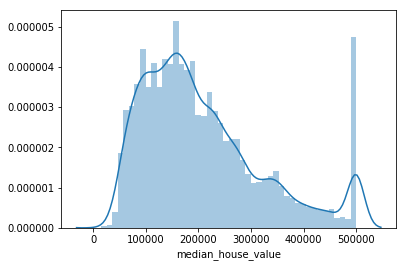

In [12]:
sns.distplot(data['median_house_value'])

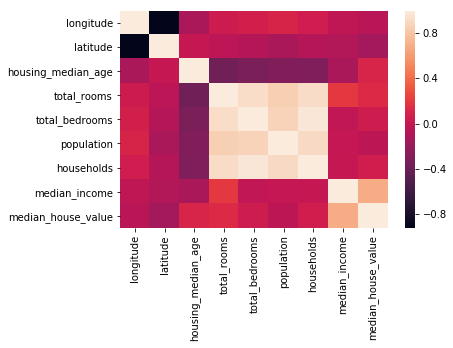

In [14]:
sns.heatmap(data.corr())

In [15]:
data.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

#### Creating the features and target variables from the dataset

In [14]:
X = data.drop('median_house_value',axis=1)
y = data['median_house_value']

In [15]:
X.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,NEAR BAY


In [16]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20640 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(8), object(1)
memory usage: 1.4+ MB


In [17]:
y.head()

0    452600.0
1    358500.0
2    352100.0
3    341300.0
4    342200.0
Name: median_house_value, dtype: float64

### Taking care of Categorical features 

In [18]:
Ocean_Proximity = pd.get_dummies(X["ocean_proximity"],drop_first=True)

In [19]:
X.drop('ocean_proximity',axis=1,inplace=True)

In [20]:
X = pd.concat([X,Ocean_Proximity],axis=1)

In [21]:
X.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,0,0,1,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,0,0,1,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,0,0,1,0


### Test train split 

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

### Feature Scaling 

In [24]:
from sklearn.preprocessing import MinMaxScaler

In [25]:
sc = MinMaxScaler(feature_range=(0,1))

In [26]:
X_train = sc.fit_transform(X_train)

In [27]:
X_test = sc.fit_transform(X_test)

### Fitting a linear regression model 

In [28]:
from sklearn.linear_model import LinearRegression

In [29]:
model = LinearRegression()

In [30]:
model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [31]:
print(model.intercept_)

252741.87394237646


In [32]:
X.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income', 'INLAND',
       'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
      dtype='object')

In [33]:
coef = pd.DataFrame(data=model.coef_,index=X.columns,columns=['Coefficient'])

In [34]:
coef

,Coefficient
longitude,-2.595351e+05
latitude,-2.384487e+05
housing_median_age,5.585635e+04
total_rooms,-1.527554e+05
total_bedrooms,4.100996e+05
population,-1.252802e+06
households,5.664745e+05
median_income,5.636003e+05
INLAND,-3.941899e+04
ISLAND,1.722478e+05


#### We can see that certain features have more influence by looking at their respective coeff

### Predicting and Visualizing test results 

In [35]:
prediction = model.predict(X_test)

Text(0,0.5,'Predicted')

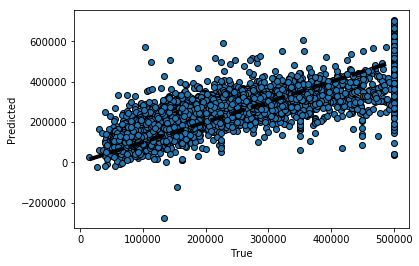

In [43]:
fig, ax = plt.subplots()
ax.scatter(y_test, prediction, edgecolors=(0, 0, 0))
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('True')
ax.set_ylabel('Predicted')

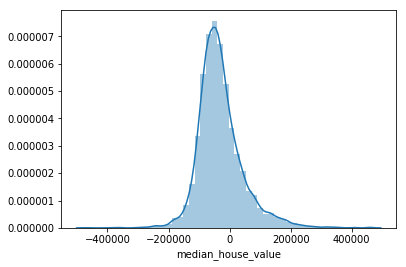

In [37]:
sns.distplot((y_test-prediction),bins=50);

#### From the above visualistions it is clear that, a simple linear regression is perhaps not enough to fit the training data perfectly. 

### Evaluating Linear Regression 

In [38]:
from sklearn import metrics

In [41]:
print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))
print('R2 Score:',metrics.r2_score(y_test,prediction))

MAE: 63395.42629151361
MSE: 6378348950.891466
RMSE: 79864.56630378372
R2 Score: 0.5286594759102812


###### The R2 score gives us a good indication of the goodness of fit of our model to the given data. A perfect score is 1 and a value of 0.52 indicates that the model is an OK fit but there is definitely more room for improvement. 